<h1 align="center">Visual Behavior Neuropixels SWDB 2022 </h1>
<h2 align="center">Session Analysis for Representational Drift</h2>
<h3 align="center">Entrypoint</h3>

# 0. SET UP - Pick Session
set up the cache, define a session, view metadata and set up respective tables

### 0.1 imports

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec #Useful tool to arrange multiple plots in one figure (https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html)
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

from util import set_up_cache, get_session, plot_unit_spikes, plot_one_trial, plot_trials, plot_trials_chron, plot_trials_timeline, horizontal_bar_plot_trials, trials_data_description
from util_eda import get_missing_durations, create_unit_activity_vectors, plot_stimulus_presentations_with_activities, get_unit_activity_vectors_for_image, average_population_response_over_same_stimulus_presentations, count_same_image_appearences, extract_speed_and_pupil_data, plot_active_vs_passive_RS_running_speed_and_pupil_area_over_time, running_speeds_and_pupil_areas, count_all_same_image_appearences, construct_unit_activity_population_response_matrix
from util_RS_plots import specific_image, plot_layered_RS_running_speed_and_pupil_area_all_images, RS_vs_speed_active_passive, RS_vs_time_avg_active_passive, correlation_between_picture_pair, RS_vs_speed_avg_active_passive, RS_vs_time_active_passive_within_blocks


%matplotlib inline

%load_ext autoreload
%autoreload 2
%aimport util

import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 0.2 set up cache

In [15]:
cache = set_up_cache()

In [16]:
ecephys_sessions_table = cache.get_ecephys_session_table()
ecephys_sessions_table.head()

behavior_session_id               date_of_acquisition  \
ecephys_session_id                                                          
1044385384                   1044408432  2020-08-19 14:47:08.574000+00:00   
1044594870                   1044624428  2020-08-20 15:03:56.422000+00:00   
1047969464                   1048005547  2020-09-02 14:53:14.347000+00:00   
1047977240                   1048009327  2020-09-02 15:15:03.733000+00:00   
1048189115                   1048221709  2020-09-03 14:16:57.913000+00:00   

                   equipment_name                 session_type  mouse_id  \
ecephys_session_id                                                         
1044385384                   NP.1  EPHYS_1_images_G_5uL_reward    524761   
1044594870                   NP.1  EPHYS_1_images_H_5uL_reward    524761   
1047969464                   NP.1  EPHYS_1_images_G_3uL_reward    509808   
1047977240                   NP.0  EPHYS_1_images_G_3uL_reward    524925   
1048189115                   NP.1  EPHYS_1_images_H_3uL_reward    509808   

                                                         genotype sex  \
ecephys_session_id                                                      
1044385384                                                  wt/wt   F   
1044594870                                                  wt/wt   F   
1047969464          Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   M   
1047977240          Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   F   
1048189115          Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   M   

                                project_code  age_in_days  unit_count  ...  \
ecephys_session_id                                                     ...   
1044385384          NeuropixelVisualBehavior          151      2179.0  ...   
1044594870          NeuropixelVisualBehavior          152      2103.0  ...   
1047969464          NeuropixelVisualBehavior          263      2438.0  ...   
1047977240          NeuropixelVisualBehavior          165      1856.0  ...   
1048189115          NeuropixelVisualBehavior          264      1925.0  ...   

                    channel_count  \
ecephys_session_id                  
1044385384                 1920.0   
1044594870                 1920.0   
1047969464                 2304.0   
1047977240                 2304.0   
1048189115                 2304.0   

                                                   structure_acronyms  \
ecephys_session_id                                                      
1044385384          ['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'LGv...   
1044594870          ['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'HPF...   
1047969464          ['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...   
1047977240          ['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...   
1048189115          ['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...   

                   image_set prior_exposures_to_image_set  session_number  \
ecephys_session_id                                                          
1044385384                 G                         30.0               1   
1044594870                 H                          0.0               2   
1047969464                 G                         62.0               1   
1047977240                 G                         51.0               1   
1048189115                 H                          0.0               2   

                    experience_level prior_exposures_to_omissions  file_id  \
ecephys_session_id                                                           
1044385384                  Familiar                            0      870   
1044594870                     Novel                            1      872   
1047969464                  Familiar                            0      877   
1047977240                  Familiar                            0      878   
1048189115                     Novel                            1      879   

                    abnormal_

### 0.3 pick mouse and session

In [17]:
ecephys_sessions_table[ecephys_sessions_table['experience_level']=='Novel']

behavior_session_id               date_of_acquisition  \
ecephys_session_id                                                          
1044594870                   1044624428  2020-08-20 15:03:56.422000+00:00   
1048189115                   1048221709  2020-09-03 14:16:57.913000+00:00   
1048196054                   1048222325  2020-09-03 14:25:07.290000+00:00   
1049514117                   1049542142  2020-09-10 15:11:15.371000+00:00   
1051155866                   1052162536  2020-09-17 15:05:39.665000+00:00   
1052533639                   1052572359  2020-09-24 15:12:13.229000+00:00   
1053925378                   1053960984  2020-10-01 16:07:18.990000+00:00   
1053941483                   1053960987  2020-10-01 17:03:58.362000+00:00   
1055403683                   1055431030  2020-10-08 15:12:55.061000+00:00   
1055415082                   1055434752  2020-10-08 15:44:11.498000+00:00   
1063010385                   1063068136  2020-11-12 15:27:33.661000+00:00   
1064639378                   1064668541  2020-11-19 15:34:05.797000+00:00   
1064644573                   1064666428  2020-11-19 15:18:01.372000+00:00   
1065905010                   1065929713  2020-11-24 14:21:48.847000+00:00   
1065908084                   1065927708  2020-11-24 14:07:51.473000+00:00   
1067781390                   1067817036  2020-12-03 14:18:28.693000+00:00   
1069461581                   1069518782  2020-12-10 14:04:24.701000+00:00   
1071300149                   1071409007  2020-12-17 14:59:40.168000+00:00   
1081429294                   1081474898  2021-02-04 14:53:48.476000+00:00   
1081431006                   1081469485  2021-02-04 14:29:30.513000+00:00   
1086410738                   1086446431  2021-02-25 15:03:47.338000+00:00   
1087992708                   1088053452  2021-03-04 14:37:22.912000+00:00   
1091039376                   1091068323  2021-03-18 14:09:41.347000+00:00   
1091039902                   1091070296  2021-03-18 14:21:13.413000+00:00   
1092466205                   1092494311  2021-03-25 15:18:29.546000+00:00   
1093864136                   1093938328  2021-04-01 14:43:52.154000+00:00   
1093867806                   1093935326  2021-04-01 14:29:33.792000+00:00   
1095340643                   1095376453  2021-04-08 14:01:56.723000+00:00   
1096935816                   1096959372  2021-04-15 14:37:33.582000+00:00   
1099869737                   1099904879  2021-04-29 14:18:47.554000+00:00   
1104289498                   1104327081  2021-05-20 14:45:32.653000+00:00   
1104297538                   1104327579  2021-05-20 14:52:47.422000+00:00   
1105798776                   1105829335  2021-05-27 13:44:25.052000+00:00   
1108528422                   1108565586  2021-06-10 13:45:04.529000+00:00   
1108531612                   1108567373  2021-06-10 13:49:08.150000+00:00   
1109889304                   1109924339  2021-06-17 14:00:33.924000+00:00   
1111216934                   1111250074  2021-06-24 13:59:17.563000+00:00   
1112515874                   1112548552  2021-07-01 13:19:23.601000+00:00   
1115356973                   1115423017  2021-07-14 15:30:14.987000+00:00   
1115368723                   1115431348  2021-07-14 15:47:10.705000+00:00   
1117148442                   1117166453  2021-07-22 14:58:15.010000+00:00   
1118508667                   1118614693  2021-07-29 13:50:20.618000+00:00   
1118512505                   1118600316  2021-07-29 13:18:24.439000+00:00   
1120251466                   1120272974  2021-08-05 13:50:07.381000+00:00   
1121607504                   1121648067  2021-08-12 14:01:31.789000+00:00   
1122903357                   1122933470  2021-08-18 13:33:50.720000+00:00   
1124285719                   1124315985  2021-08-25 13:55:58.475000+00:00   
1125713722                   1125752903  2021-09-01 14:24:41.594000+00:00   
1128719842                   1128774624  2021-09-16 13:51:43.599000+00:00   
1130349290                   1130378962  2021-09-23 13:34:57.267000+00:00   
1140102579      

In [117]:
#ecephys_sessions_table[ecephys_sessions_table['mouse_id']==527749] # originial mouse
ecephys_sessions_table[ecephys_sessions_table['mouse_id']==524761] # different mouse 1
# ecephys_sessions_table[ecephys_sessions_table['mouse_id']==577287] # different mouse 2

behavior_session_id               date_of_acquisition  \
ecephys_session_id                                                          
1044385384                   1044408432  2020-08-19 14:47:08.574000+00:00   
1044594870                   1044624428  2020-08-20 15:03:56.422000+00:00   

                   equipment_name                 session_type  mouse_id  \
ecephys_session_id                                                         
1044385384                   NP.1  EPHYS_1_images_G_5uL_reward    524761   
1044594870                   NP.1  EPHYS_1_images_H_5uL_reward    524761   

                   genotype sex              project_code  age_in_days  \
ecephys_session_id                                                       
1044385384            wt/wt   F  NeuropixelVisualBehavior          151   
1044594870            wt/wt   F  NeuropixelVisualBehavior          152   

                    unit_count  ...  channel_count  \
ecephys_session_id              ...                  
1044385384              2179.0  ...         1920.0   
1044594870              2103.0  ...         1920.0   

                                                   structure_acronyms  \
ecephys_session_id                                                      
1044385384          ['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'LGv...   
1044594870          ['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'HPF...   

                   image_set prior_exposures_to_image_set  session_number  \
ecephys_session_id                                                          
1044385384                 G                         30.0               1   
1044594870                 H                          0.0               2   

                    experience_level prior_exposures_to_omissions  file_id  \
ecephys_session_id                                                           
1044385384                  Familiar                            0      870   
1044594870                     Novel                            1      872   

                    abnormal_histology abnormal_activity  
ecephys_session_id                                        
1044385384                         NaN               NaN  
1044594870                         NaN               NaN  

[2 rows x 21 columns]

In [118]:
# sessionID = 1053941483  # 1 # Novel Session of Mouse with ID: 527749 (DAY 2, Novel, H)  (original)
# sessionID = 1053718935  # 2 # Familiar Session of (same) Mouse with ID: 527749 (DAY 1, Familiar, G)
sessionID = 1044385384  # 3 # Familiar Session of Mouse with ID: 524761 (different mouse, wt, DAY 1) 
# sessionID = 1124285719  # 4 # Novel Session of Mouse with ID: 577287 (H, DAY 1, f, sst)  (different)


In [119]:
session = get_session(session_id=sessionID)

In [120]:
session.metadata

/Users/kiracordes/opt/anaconda3/lib/python3.7/site-packages/allensdk/brain_observatory/behavior/data_objects/metadata/subject_metadata/full_genotype.py:57: UserWarning: Unable to parse cre_line from full_genotype
  warnings.warn('Unable to parse cre_line from full_genotype')


{'equipment_name': 'NP.1',
 'sex': 'F',
 'age_in_days': 151,
 'stimulus_frame_rate': 60.0,
 'session_type': 'EPHYS_1_images_G_5uL_reward',
 'date_of_acquisition': datetime.datetime(2020, 8, 19, 21, 47, 8, tzinfo=tzutc()),
 'reporter_line': None,
 'cre_line': None,
 'behavior_session_uuid': None,
 'driver_line': [],
 'mouse_id': 524761,
 'full_genotype': 'wt/wt',
 'behavior_session_id': 1044408432,
 'ecephys_session_id': 1044385384}

### 0.4 set up tables

In [121]:
stimulus_presentations = session.stimulus_presentations
# This table is a record of every stimulus we presented to the mouse over the course of this experiment
print(len(stimulus_presentations))
# stimulus_presentations.tail()
# stimulus_presentations.head()

13397


In [122]:
units = session.get_units()
# This table contains quality metrics and waveform metrics for every unit recorded during this session
units.head()

channels = session.get_channels()
# This table contains info about where each channel was in the brain as well as it's relative position along the probe.
channels.head(3)

# merge
units = units.merge(channels, left_on='peak_channel_id', right_index=True)
#units.head()

# how many units were recorded in each brain area for this session?
# units.value_counts('structure_acronym')

In [123]:
trials = session.trials
change_trials = trials[trials.is_change]
spike_times = session.spike_times
running_speed = session.running_speed
eye_tracking = session.eye_tracking

# 1. Pick Units 
specify which units are considered 'good' and from which brain regions

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Now that we have our change times, we're almost ready to make our PSTH. Next we need to get spike times for a good unit. To start out, let's filter our units dataframe for 'good' units, based on the following criteria:
    <p> &emsp; a) <code>quality</code> == 'good'
            <p> &emsp; b) <code>firing_rate</code> > 1 Hz
            <p> &emsp; c) <code>snr</code> > 1
            <p> &emsp; d) <code>isi_violations</code> < 1
                                                         
Then we'll grab an example unit from this curated list
</div>

In [124]:
# Filter units by the quality criteria
good_units = units[(units['quality']=='good') &
                   (units['firing_rate']>1) &
                   (units['snr']>1) &
                   (units['isi_violations']<1)]

len(good_units)

1054

In [125]:
good_units.head(1)

PT_ratio  amplitude  amplitude_cutoff  cluster_id  \
id                                                              
1049374910  0.001205  334.31424          0.003587         489   

            cumulative_drift  d_prime  firing_rate  isi_violations  \
id                                                                   
1049374910            125.59  5.18243     8.577549        0.009934   

            isolation_distance  l_ratio  ...  waveform_duration  \
id                                       ...                      
1049374910           70.970062  0.00143  ...            0.79665   

            anterior_posterior_ccf_coordinate  dorsal_ventral_ccf_coordinate  \
id                                                                             
1049374910                             7935.0                          925.0   

                                                    filtering  \
id                                                              
1049374910  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   

            left_right_ccf_coordinate  probe_channel_number  \
id                                                            
1049374910                     7577.0                   283   

           probe_horizontal_position    probe_id  probe_vertical_position  \
id                                                                          
1049374910                        27  1044506933                     2840   

            structure_acronym  
id                             
1049374910              VISpm  

[1 rows x 34 columns]

In [126]:
good_VISp_units = good_units[good_units['structure_acronym']=='VISp']
good_CA1_units = good_units[good_units['structure_acronym']=='CA1']
good_VIS_units = good_units[good_units['structure_acronym'].str.contains('VIS')]
len(good_CA1_units), len(good_VISp_units), len(good_VIS_units)

(193, 35, 367)

In [127]:
good_non_VISp_units = good_units[good_units['structure_acronym']!='VISp']
good_VIS_without_VISp_units = good_non_VISp_units[good_non_VISp_units['structure_acronym'].str.contains('VIS')]

assert len(good_VIS_units) == (len(good_VIS_without_VISp_units)+len(good_VISp_units))

len(good_non_VISp_units), len(good_VIS_without_VISp_units), len(good_VIS_without_VISp_units)+len(good_VISp_units), len(good_VIS_units)
                                              

(1019, 332, 367, 367)

# 2. Construct Unit Activity Matrix (population response vectors)
 
 from picked units and spikes in each stimulus presentation

### 2.1 construct and plot RS
 

In [128]:
stimulus_presentations
(len(stimulus_presentations),len(stimulus_presentations[stimulus_presentations.stimulus_block == 0]))

(13397, 4800)

In [ ]:
M_all_good = construct_unit_activity_population_response_matrix(good_units, spike_times, stimulus_presentations)


In [ ]:
M_good_VIS = construct_unit_activity_population_response_matrix(good_VIS_units, spike_times, stimulus_presentations)


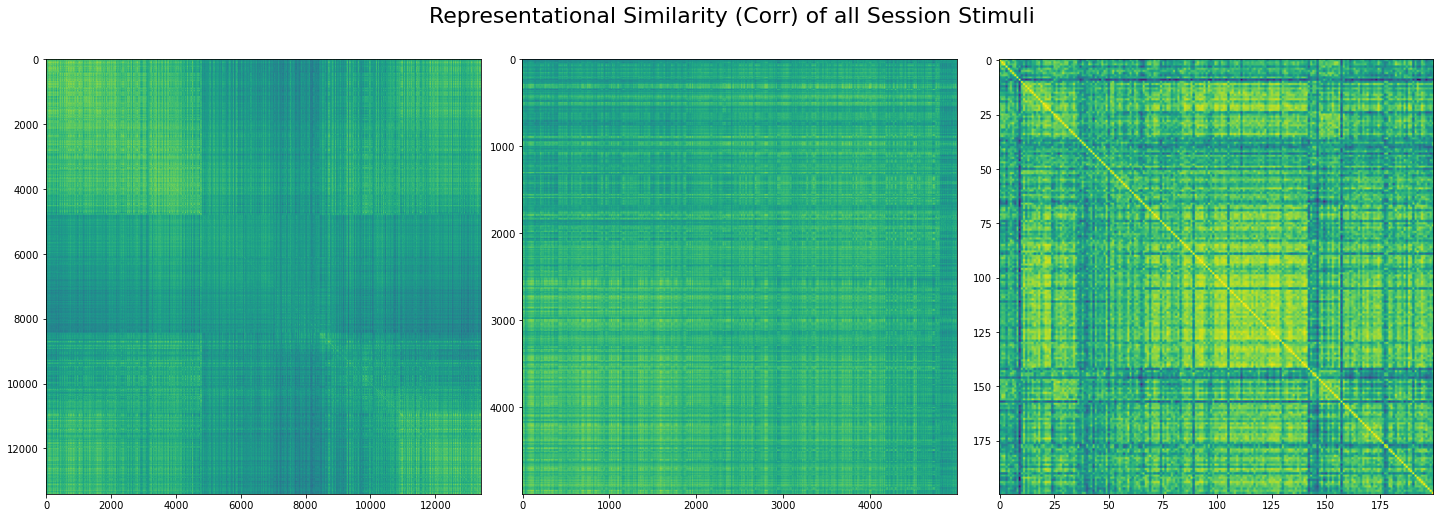

In [129]:
M_good_VISp = construct_unit_activity_population_response_matrix(good_VISp_units, spike_times, stimulus_presentations)


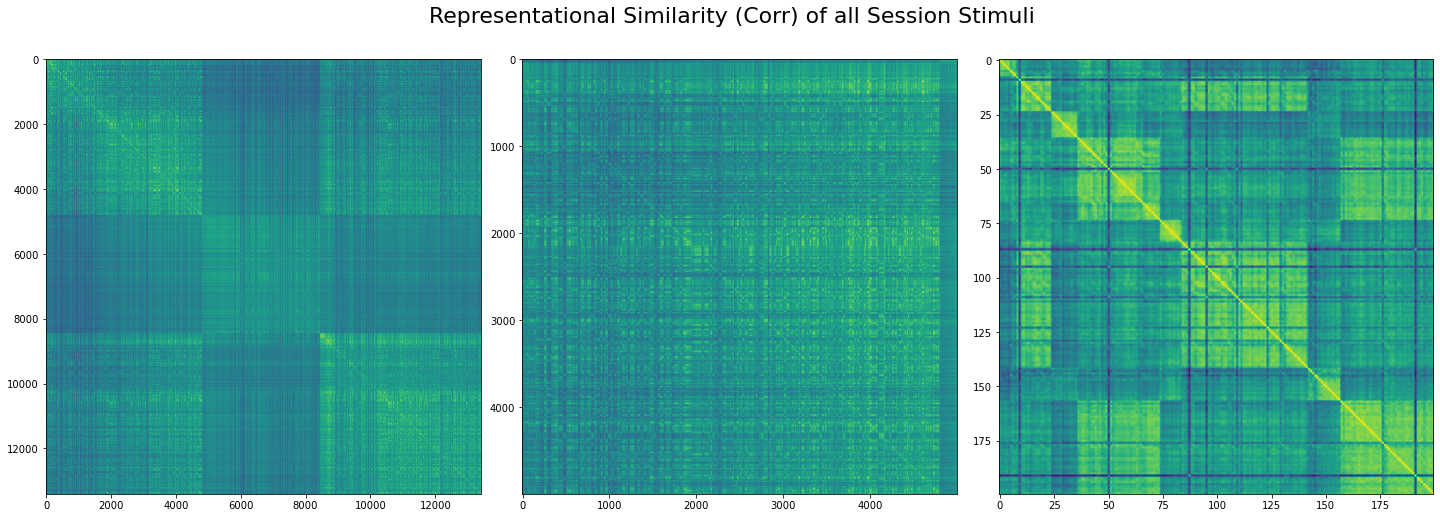

In [130]:
M_good_VIS_excld_VISp = construct_unit_activity_population_response_matrix(good_VIS_without_VISp_units, spike_times, stimulus_presentations)


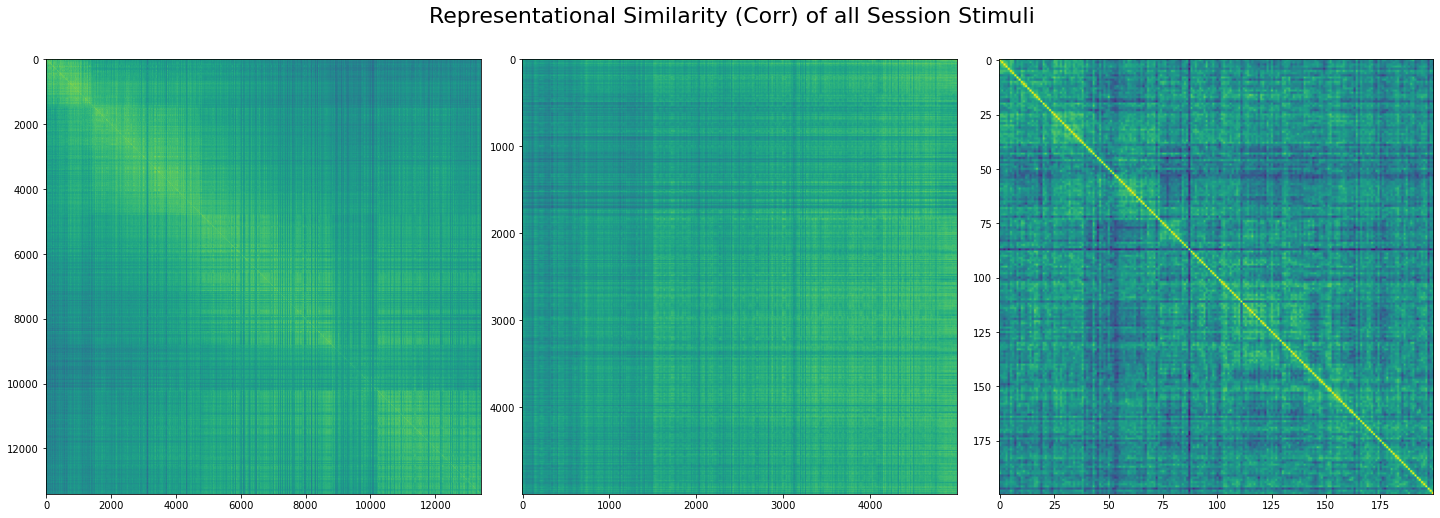

In [131]:
M_good_CA1 = construct_unit_activity_population_response_matrix(good_CA1_units, spike_times, stimulus_presentations)


### 2.2 show within image Correlation and between image-pair

(choose 2 images)

In [ ]:
correlation_between_picture_pair('im111_r', 'im087_r', M_all_good, stimulus_presentations)

In [ ]:
correlation_between_picture_pair('im111_r', 'im087_r', M_good_VIS, stimulus_presentations)

In [ ]:
correlation_between_picture_pair('im111_r', 'im087_r', M_good_VISp, stimulus_presentations)

In [ ]:
correlation_between_picture_pair('im111_r', 'im087_r', M_good_VIS_excld_VISp, stimulus_presentations)

In [ ]:
correlation_between_picture_pair('im111_r', 'im087_r', M_good_CA1, stimulus_presentations)

# 3. Plot Representational Similarity, Pupil Area and Running Speed 
averaged over same image chains

In [132]:
valid_images = []
for im in stimulus_presentations.image_name.unique():
    if (im != 'omitted') and (type(im) is not float):
        valid_images.append(im)
        
print(valid_images)


['im036_r', 'im111_r', 'im012_r', 'im083_r', 'im078_r', 'im047_r', 'im044_r', 'im115_r']


### 3.1 one image
plot RS with Behaviour and Time for a specified image
 

In [ ]:
specific_image('im111_r', M_all_good, stimulus_presentations, running_speed, eye_tracking, change_trials)

In [ ]:
specific_image('im111_r', M_good_VIS, stimulus_presentations, running_speed, eye_tracking, change_trials)

In [ ]:
specific_image('im111_r', M_good_VISp, stimulus_presentations, running_speed, eye_tracking, change_trials)

In [ ]:
specific_image('im111_r', M_good_VIS_excld_VISp, stimulus_presentations, running_speed, eye_tracking, change_trials)

In [ ]:
specific_image('im111_r', M_good_CA1, stimulus_presentations, running_speed, eye_tracking, change_trials)

### 3.2 all images layered
same plot with all images at once 

In [133]:
colors = ['blue', 'orange', 'purple', 'firebrick', 'cornflowerblue', 'darkblue', 'magenta', 'green', 'thistle']

In [134]:
sessionID

1044385384

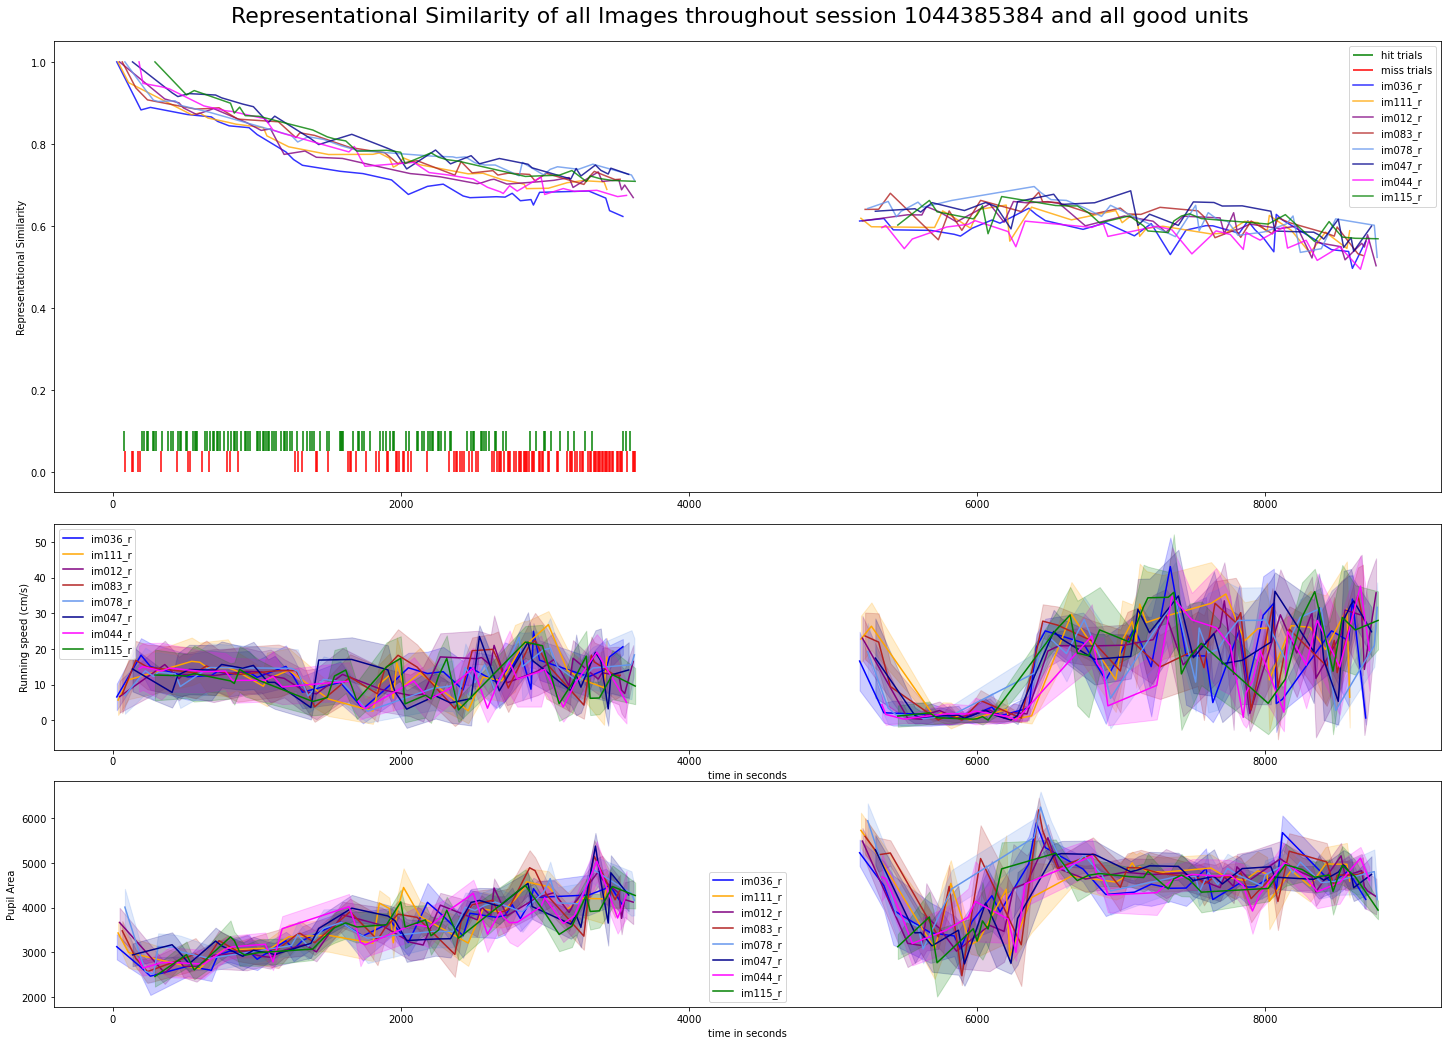

In [135]:
# print all images layered for M_all_good
title = f'Representational Similarity of all Images throughout session {sessionID} and all good units'
plot_layered_RS_running_speed_and_pupil_area_all_images(valid_images, M_all_good, stimulus_presentations, running_speed, eye_tracking, colors, change_trials, title)



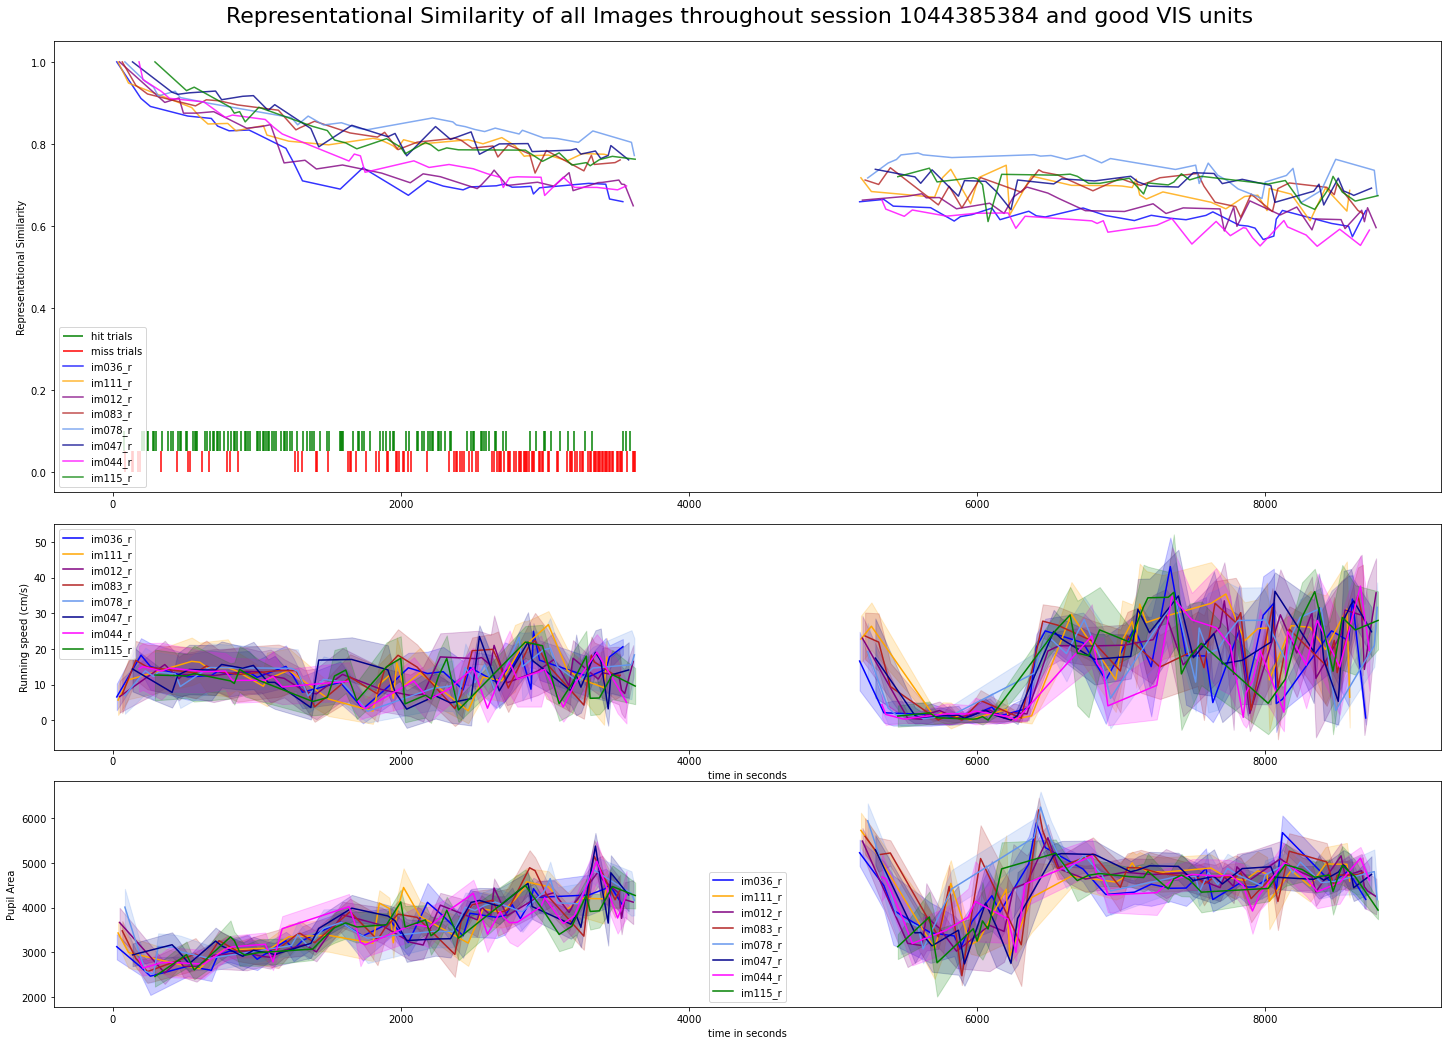

In [136]:
title = f'Representational Similarity of all Images throughout session {sessionID} and good VIS units'
plot_layered_RS_running_speed_and_pupil_area_all_images(valid_images, M_good_VIS, stimulus_presentations, running_speed, eye_tracking, colors, change_trials, title)


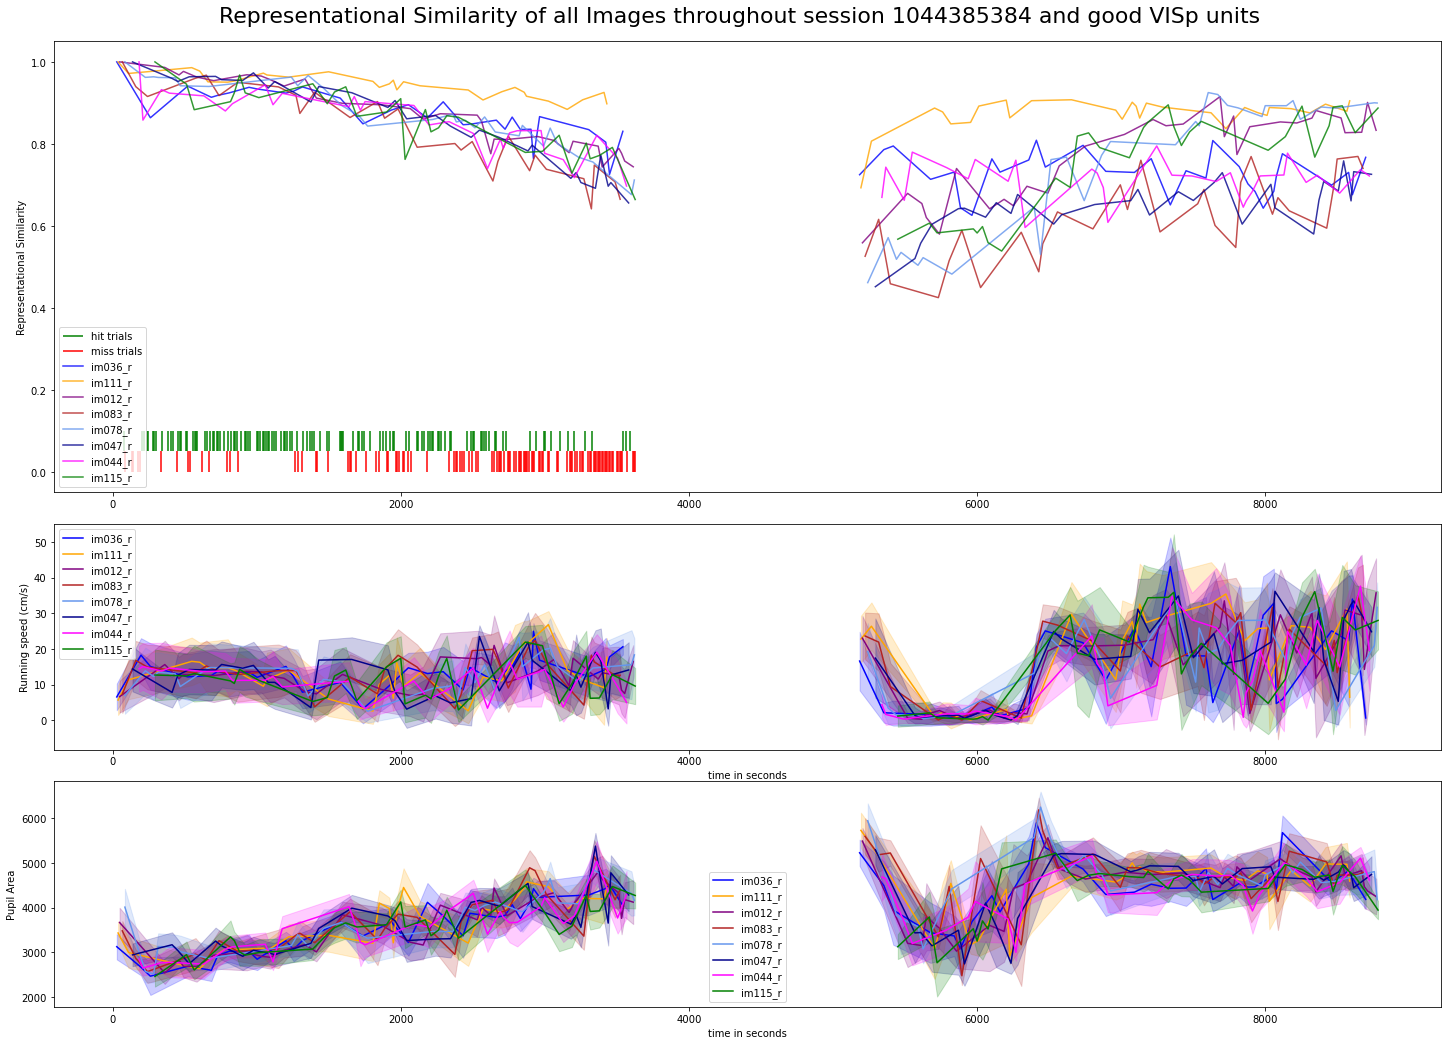

In [137]:
# print all images layered for M
title = f'Representational Similarity of all Images throughout session {sessionID} and good VISp units'
plot_layered_RS_running_speed_and_pupil_area_all_images(valid_images, M_good_VISp, stimulus_presentations, running_speed, eye_tracking, colors, change_trials, title)


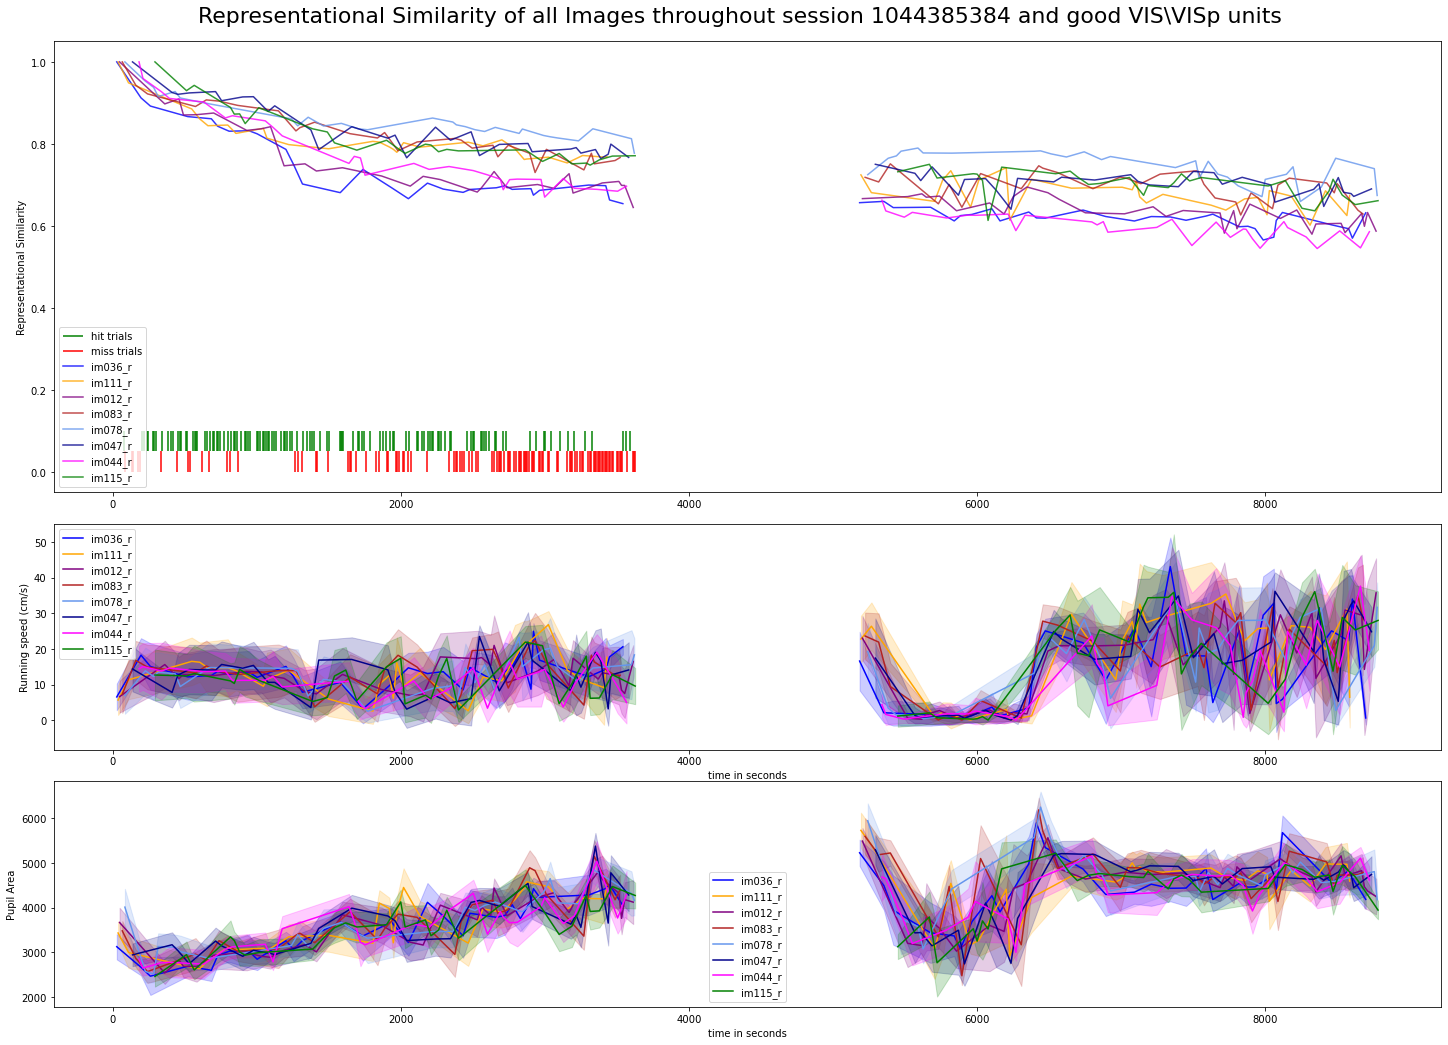

In [138]:
title = f'Representational Similarity of all Images throughout session {sessionID} and good VIS\VISp units'
# print all images layered for M
plot_layered_RS_running_speed_and_pupil_area_all_images(valid_images, M_good_VIS_excld_VISp, stimulus_presentations, running_speed, eye_tracking, colors, change_trials, title)


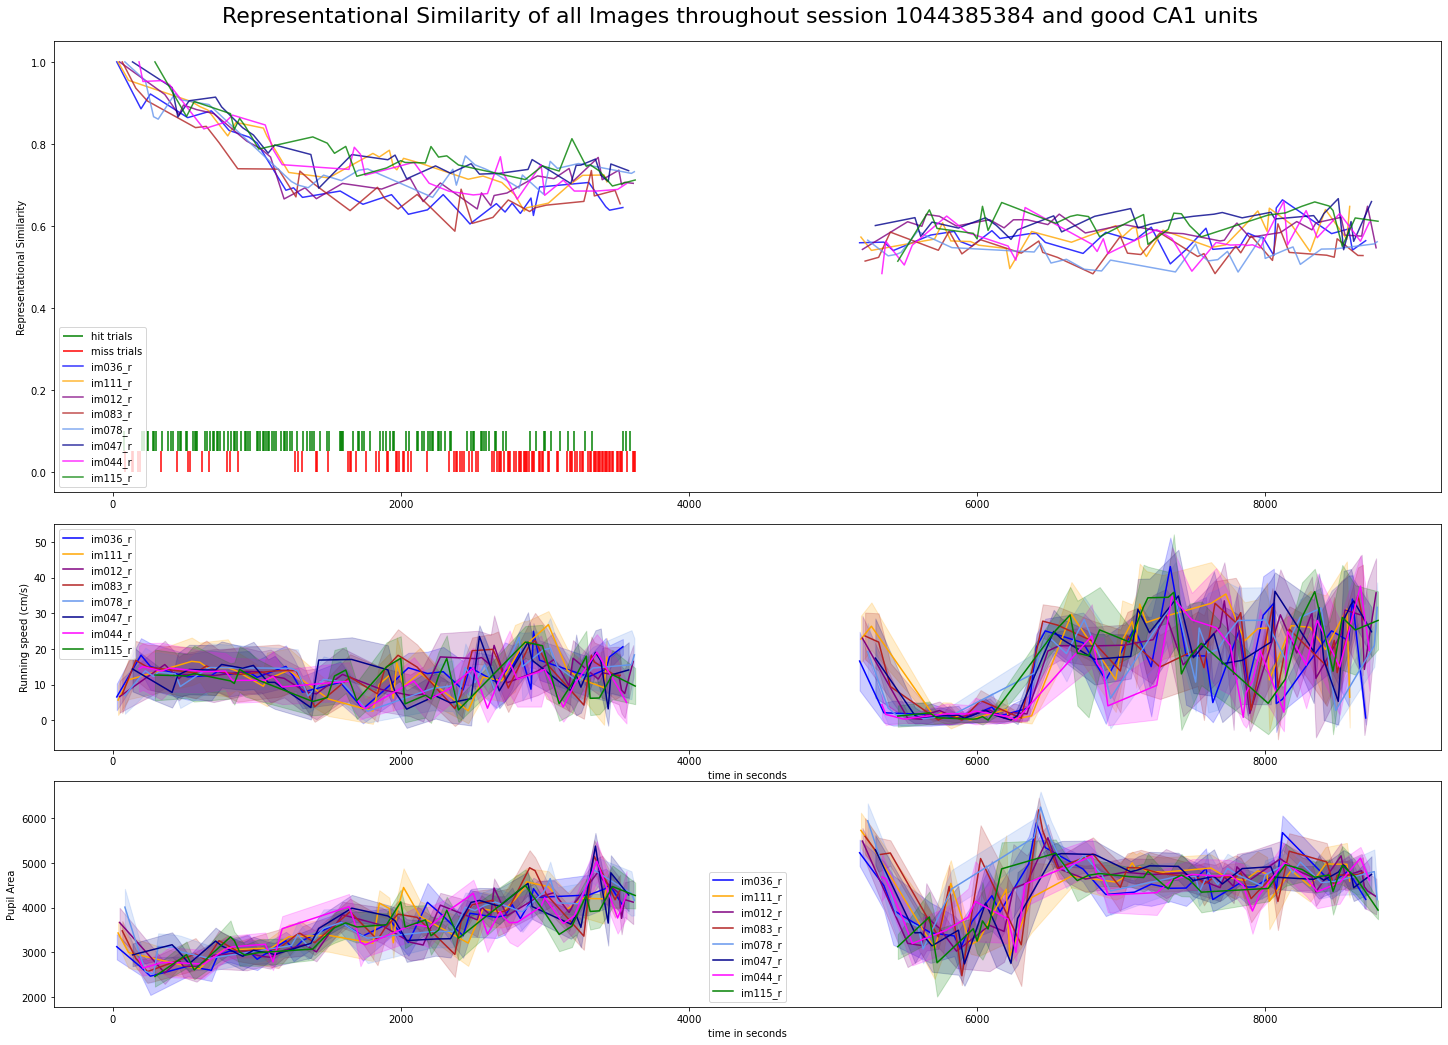

In [139]:
title = f'Representational Similarity of all Images throughout session {sessionID} and good CA1 units'
plot_layered_RS_running_speed_and_pupil_area_all_images(valid_images, M_good_CA1, stimulus_presentations, running_speed, eye_tracking, colors, change_trials, title)


### 3.3 each image
same plot for each image 

In [ ]:
# print all images full information

for image in valid_images:
    specific_image(image, M_all_good, stimulus_presentations, running_speed, eye_tracking, change_trials)
    

In [ ]:
# print all images full information

for image in valid_images:
    specific_image(image, M_good_VIS, stimulus_presentations, running_speed, eye_tracking, change_trials)

In [ ]:
# print all images full information

for image in valid_images:
    specific_image(image, M_good_VISp, stimulus_presentations, running_speed, eye_tracking, change_trials)

In [ ]:
# print all images full information

for image in valid_images:
    specific_image(image, M_good_VIS_excld_VISp, stimulus_presentations, running_speed, eye_tracking, change_trials)

In [ ]:
# print all images full information

for image in valid_images:
    specific_image(image, M_good_CA1, stimulus_presentations, running_speed, eye_tracking, change_trials)

#  4. Representational Similarity vs. Behavioural State Difference
difference in running speed and pupil size for specified image with and without chain-average

In [ ]:
# specify image:
im = 'im111_r'

### 4.1 RS and Behaviour: Running Speed and Pupil Area 
fix picture in active/passive/both blocks

In [ ]:
# all good units

RS_vs_speed_active_passive(im, M_all_good, stimulus_presentations, running_speed, eye_tracking,'running', 'active')
RS_vs_speed_active_passive(im, M_all_good, stimulus_presentations, running_speed, eye_tracking,'pupil', 'active')
# RS_vs_speed_active_passive(im, M_all_good, stimulus_presentations, running_speed, eye_tracking,'running', 'both')
# RS_vs_speed_active_passive(im, M_all_good, stimulus_presentations, running_speed, eye_tracking,'pupil', 'both')


In [ ]:
# good VIS

RS_vs_speed_active_passive(im, M_good_VIS, stimulus_presentations, running_speed, eye_tracking,'running', 'active')
RS_vs_speed_active_passive(im, M_good_VIS, stimulus_presentations, running_speed, eye_tracking,'pupil', 'active')
# RS_vs_speed_active_passive(im, M_good_VIS, stimulus_presentations, running_speed, eye_tracking,'running', 'both')
# RS_vs_speed_active_passive(im, M_good_VIS, stimulus_presentations, running_speed, eye_tracking,'pupil', 'both')


In [ ]:
# good VISp

RS_vs_speed_active_passive(im, M_good_VISp, stimulus_presentations, running_speed, eye_tracking,'running', 'active')
RS_vs_speed_active_passive(im, M_good_VISp, stimulus_presentations, running_speed, eye_tracking,'pupil', 'active')
# RS_vs_speed_active_passive(im, M_good_VISp, stimulus_presentations, running_speed, eye_tracking,'running', 'both')
# RS_vs_speed_active_passive(im, M_good_VISp, stimulus_presentations, running_speed, eye_tracking,'pupil', 'both')


In [ ]:
# good VIS without VISp

RS_vs_speed_active_passive(im, M_good_VIS_excld_VISp, stimulus_presentations, running_speed, eye_tracking,'running', 'active')
RS_vs_speed_active_passive(im, M_good_VIS_excld_VISp, stimulus_presentations, running_speed, eye_tracking,'pupil', 'active')
# RS_vs_speed_active_passive(im, M_good_VISp, stimulus_presentations, running_speed, eye_tracking,'running', 'both')
# RS_vs_speed_active_passive(im, M_good_VISp, stimulus_presentations, running_speed, eye_tracking,'pupil', 'both')


In [ ]:
# good CA1

RS_vs_speed_active_passive(im, M_good_CA1, stimulus_presentations, running_speed, eye_tracking,'running', 'active')
RS_vs_speed_active_passive(im, M_good_CA1, stimulus_presentations, running_speed, eye_tracking,'pupil', 'active')
# RS_vs_speed_active_passive(im, M_good_CA1, stimulus_presentations, running_speed, eye_tracking,'running', 'both')
# RS_vs_speed_active_passive(im, M_good_CA1, stimulus_presentations, running_speed, eye_tracking,'pupil', 'both')


### 4.2 RS vs. Behaviour but averaged over chains
fix picture in active/ passive block

In [ ]:
RS_vs_speed_avg_active_passive(im, M_all_good, stimulus_presentations, running_speed, eye_tracking, 'pupil')
RS_vs_speed_avg_active_passive(im, M_all_good, stimulus_presentations, running_speed, eye_tracking, 'running')

In [ ]:
RS_vs_speed_avg_active_passive(im, M_good_VIS, stimulus_presentations, running_speed, eye_tracking, 'pupil')
RS_vs_speed_avg_active_passive(im, M_good_VIS, stimulus_presentations, running_speed, eye_tracking, 'running')

In [ ]:
RS_vs_speed_avg_active_passive(im, M_good_VISp, stimulus_presentations, running_speed, eye_tracking, 'pupil')
RS_vs_speed_avg_active_passive(im, M_good_VISp, stimulus_presentations, running_speed, eye_tracking, 'running')

In [ ]:
RS_vs_speed_avg_active_passive(im, M_good_VIS_excld_VISp, stimulus_presentations, running_speed, eye_tracking, 'pupil')
RS_vs_speed_avg_active_passive(im, M_good_VIS_excld_VISp, stimulus_presentations, running_speed, eye_tracking, 'running')

In [ ]:
RS_vs_speed_avg_active_passive(im, M_good_CA1, stimulus_presentations, running_speed, eye_tracking, 'pupil')
RS_vs_speed_avg_active_passive(im, M_good_CA1, stimulus_presentations, running_speed, eye_tracking, 'running')

#  5. Representational Similarity vs. Time Difference
averaged over image chains for specified image

In [ ]:
# specify image:
im = 'im111_r'

### 5.1 within blocks active/passive

In [ ]:
RS_vs_time_active_passive_within_blocks(im, M_all_good, stimulus_presentations)

In [ ]:
RS_vs_time_active_passive_within_blocks(im, M_good_VIS, stimulus_presentations)

In [ ]:
RS_vs_time_active_passive_within_blocks(im, M_good_VISp, stimulus_presentations)

In [ ]:
RS_vs_time_active_passive_within_blocks(im, M_good_VIS_excld_VISp, stimulus_presentations)

In [ ]:
RS_vs_time_active_passive_within_blocks(im, M_good_CA1, stimulus_presentations)

### 5.2 averaged over chains

In [ ]:
RS_vs_time_avg_active_passive(im, M_all_good, stimulus_presentations)

In [ ]:
RS_vs_time_avg_active_passive(im, M_good_VIS, stimulus_presentations)

In [ ]:
RS_vs_time_avg_active_passive(im, M_good_VISp, stimulus_presentations)

In [ ]:
RS_vs_time_avg_active_passive(im, M_good_VIS_excld_VISp, stimulus_presentations)

In [ ]:
RS_vs_time_avg_active_passive(im, M_good_CA1, stimulus_presentations)

#  6. Tuning Curves
mean spike counts of a unit for each image

In [146]:
len(valid_images)

8

In [205]:
n = M_good_VISp.shape[0] # number of units

tuning = np.zeros((n, len(valid_images)))
error = np.zeros(tuning.shape)

for i, image in enumerate(valid_images):
    same_stimuli_M, _, _ = get_unit_activity_vectors_for_image(image, M_good_VISp, stimulus_presentations)
    # print(same_stimuli_M.shape)
    mean_spike_cnt = np.mean(same_stimuli_M, axis = 1)
    std_spike_cnt = np.std(same_stimuli_M, axis = 1)
    tuning[:, i] = mean_spike_cnt
    error[:, i] = std_spike_cnt

# print(tuning)


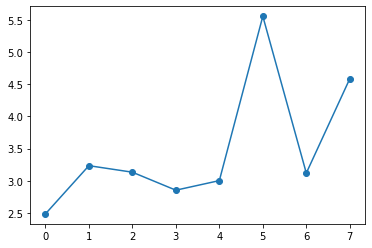

In [209]:
plt.plot(tuning[1,:], marker='o')

In [200]:
im_shorts = []
for image in valid_images:
    im_shorts.append(image[2:5])

print(im_shorts)

['036', '111', '012', '083', '078', '047', '044', '115']


Text(0.45, 0.1, 'presented images')

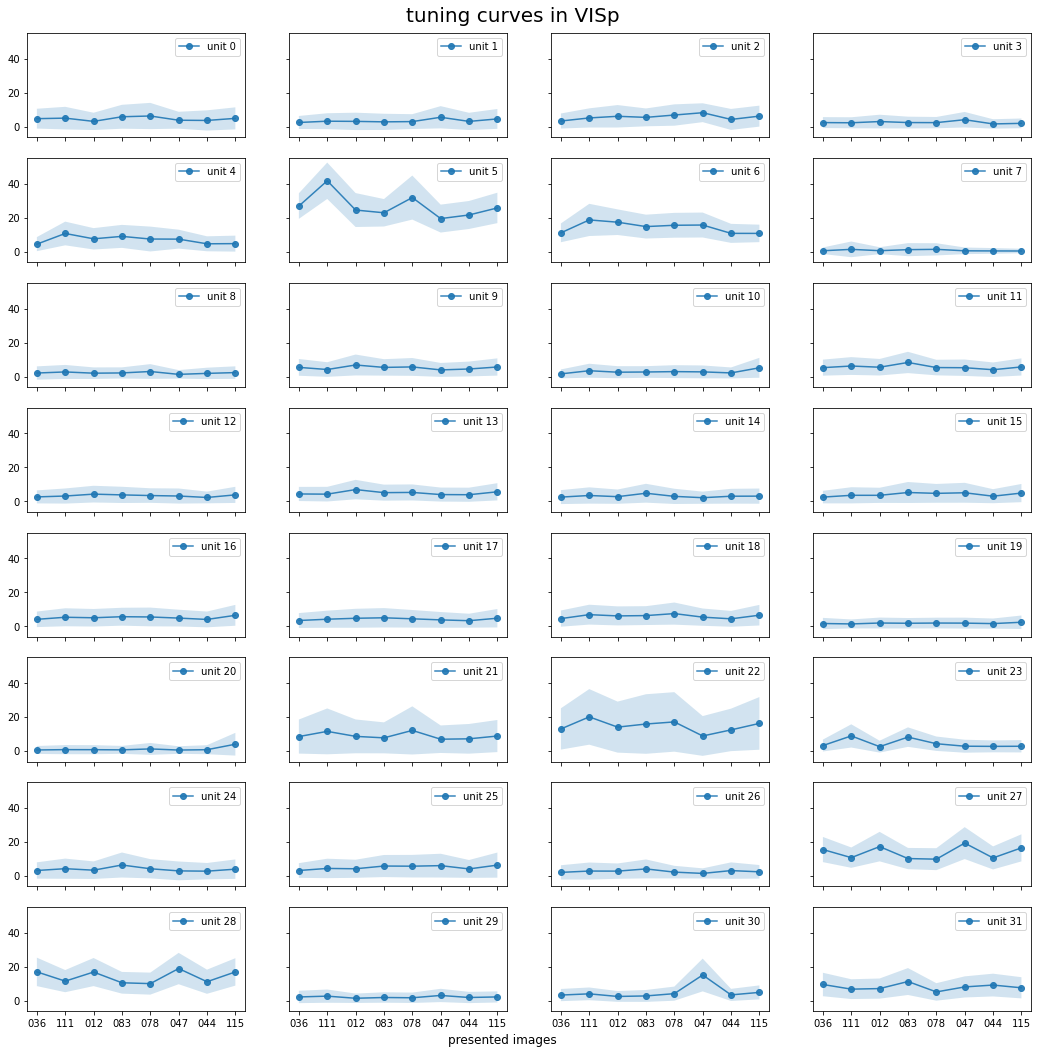

In [207]:
fig, axes = plt.subplots(nrows=int(n/4), ncols=4, figsize=(18,18), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    ax.plot(im_shorts, tuning[i,:], alpha=0.9, marker='o', label=f'unit {i}')
    ax.fill_between(im_shorts, tuning[i,:]-error[i,:], tuning[i,:]+error[i,:], alpha=0.2)
    # ax.set_title(f'unit {i}')
    # ax.set_xticks(valid_images)
    ax.legend()
fig.suptitle(f'tuning curves in VISp', fontsize=20, y=0.9)
fig.text(s=f'presented images', fontsize=12, y=0.1, x=0.45)



# TODO and NEXT

In [ ]:
# Time Difference vs Similarity for unavageraged data
# some function names are wrong/ misleading
# for un-averaged difference plots: 
#                 try plotting only every second datapoint, 
#                 so that active vs. passive is more visible
# test with new session